In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

DATA = Path('.').resolve()

In [19]:
cereals_df = pd.read_csv(DATA/'Cereals.csv')
cereals_df = cereals_df.iloc[:,3:].apply(lambda x: x.astype('float64'))
cereals_df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,1.0,0.33,68.402973
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1.0,1.00,33.983679
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1.0,0.33,59.425505
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,1.0,0.50,93.704912
4,110.0,2.0,2.0,200.0,1.0,14.0,8.0,NaN,25.0,3.0,1.0,0.75,34.384843


# Apply hierarchical clustering to the data using Manhattan distance to the normalized measurements. Compare the dendrograms from single linkage and complete linkage, and look at cluster centroids. Comment on the structure of the clusters and on their stability. (7 points)

In [20]:
cereals_df.dropna(inplace=True)
cereals_df = cereals_df.reset_index(drop=True)
cereals_df.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3.0,1.0,0.33,68.402973
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3.0,1.0,1.00,33.983679
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3.0,1.0,0.33,59.425505
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3.0,1.0,0.50,93.704912
4,110.0,2.0,2.0,180.0,1.5,10.5,10.0,70.0,25.0,1.0,1.0,0.75,29.509541


In [22]:
cereals_df_norm = cereals_df.apply(preprocessing.scale, axis=0)

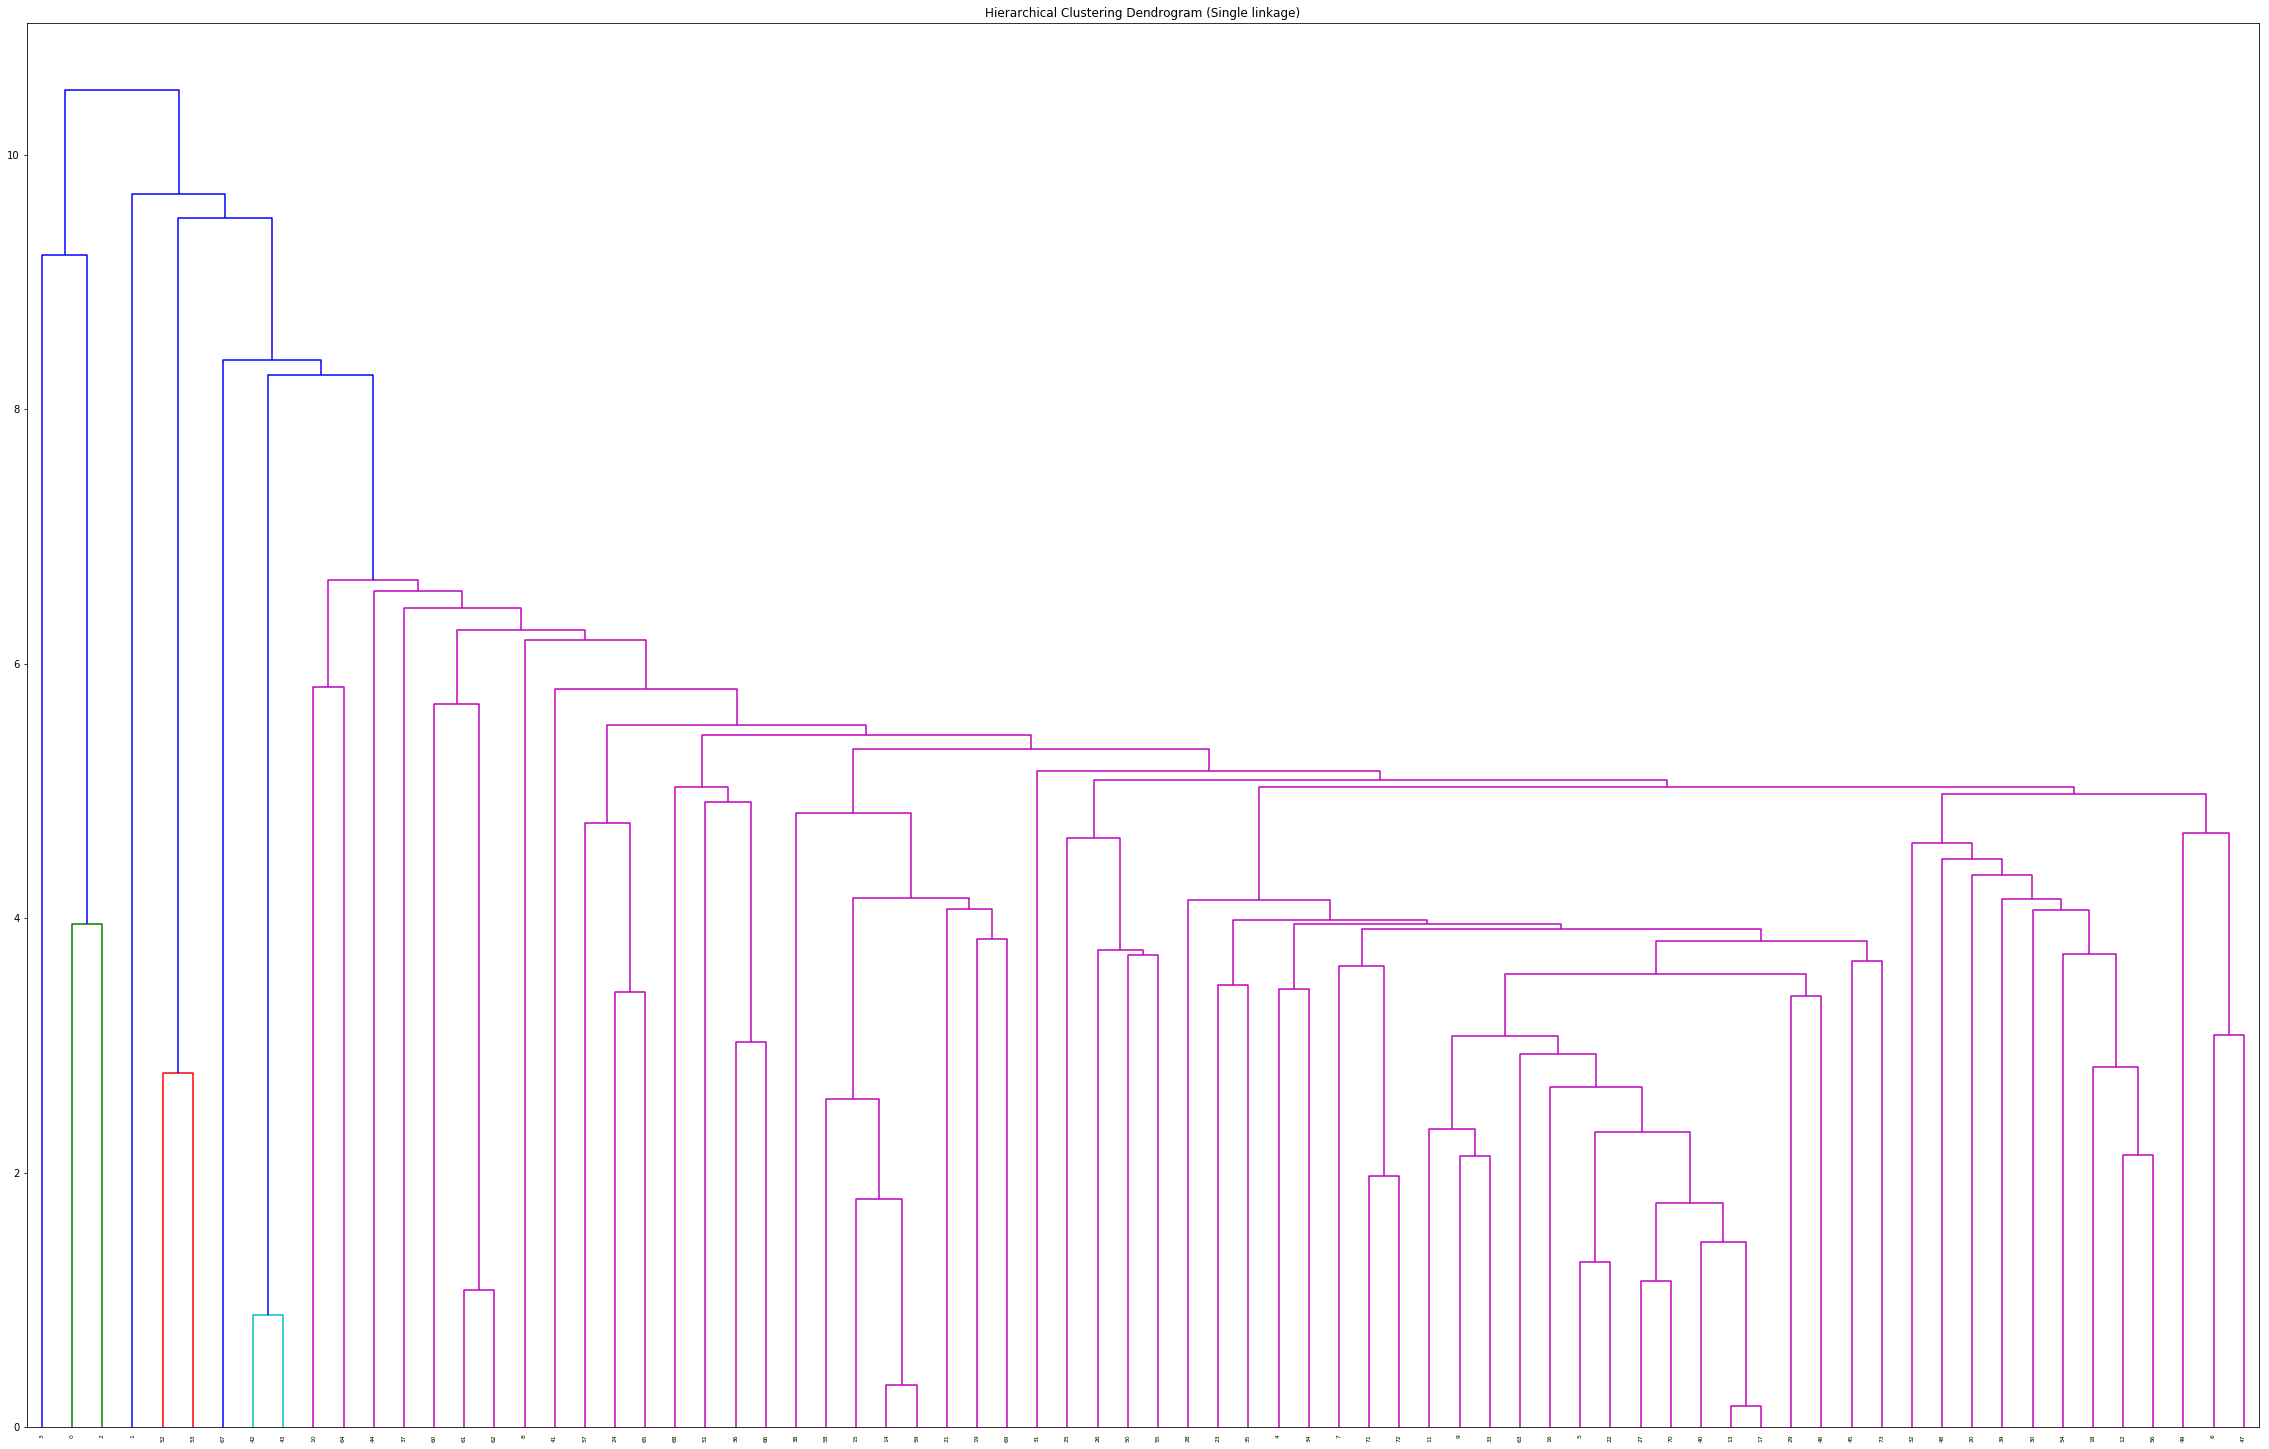

In [23]:
Z = linkage(cereals_df_norm, method='single', metric='cityblock')
fig = plt.figure(figsize=(40, 30))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
dendrogram(Z, labels=cereals_df_norm.index)
plt.show()

In [25]:
memb = fcluster(linkage(cereals_df_norm, method='single', metric='cityblock'), 4, criterion='maxclust')
centroids = {}
for key, item in cereals_df_norm.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 3
Cluster 2: size 2
Cluster 3: size 68
Cluster 4: size 1


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,-2.22,1.39,-0.33,0.17,3.67,-2.09,-0.79,3.00,-0.18,0.95,-0.20,-1.86,2.26
2,-2.89,-0.95,-1.00,-1.98,-0.70,-0.84,-1.64,-0.94,-1.31,0.95,-3.48,0.76,1.40
3,0.17,-0.04,-0.01,0.08,-0.14,0.14,0.08,-0.11,0.07,-0.08,0.11,0.05,-0.13
4,0.66,0.46,4.00,-1.79,-0.07,-1.74,0.21,0.52,-1.31,0.95,-0.20,0.76,-0.60


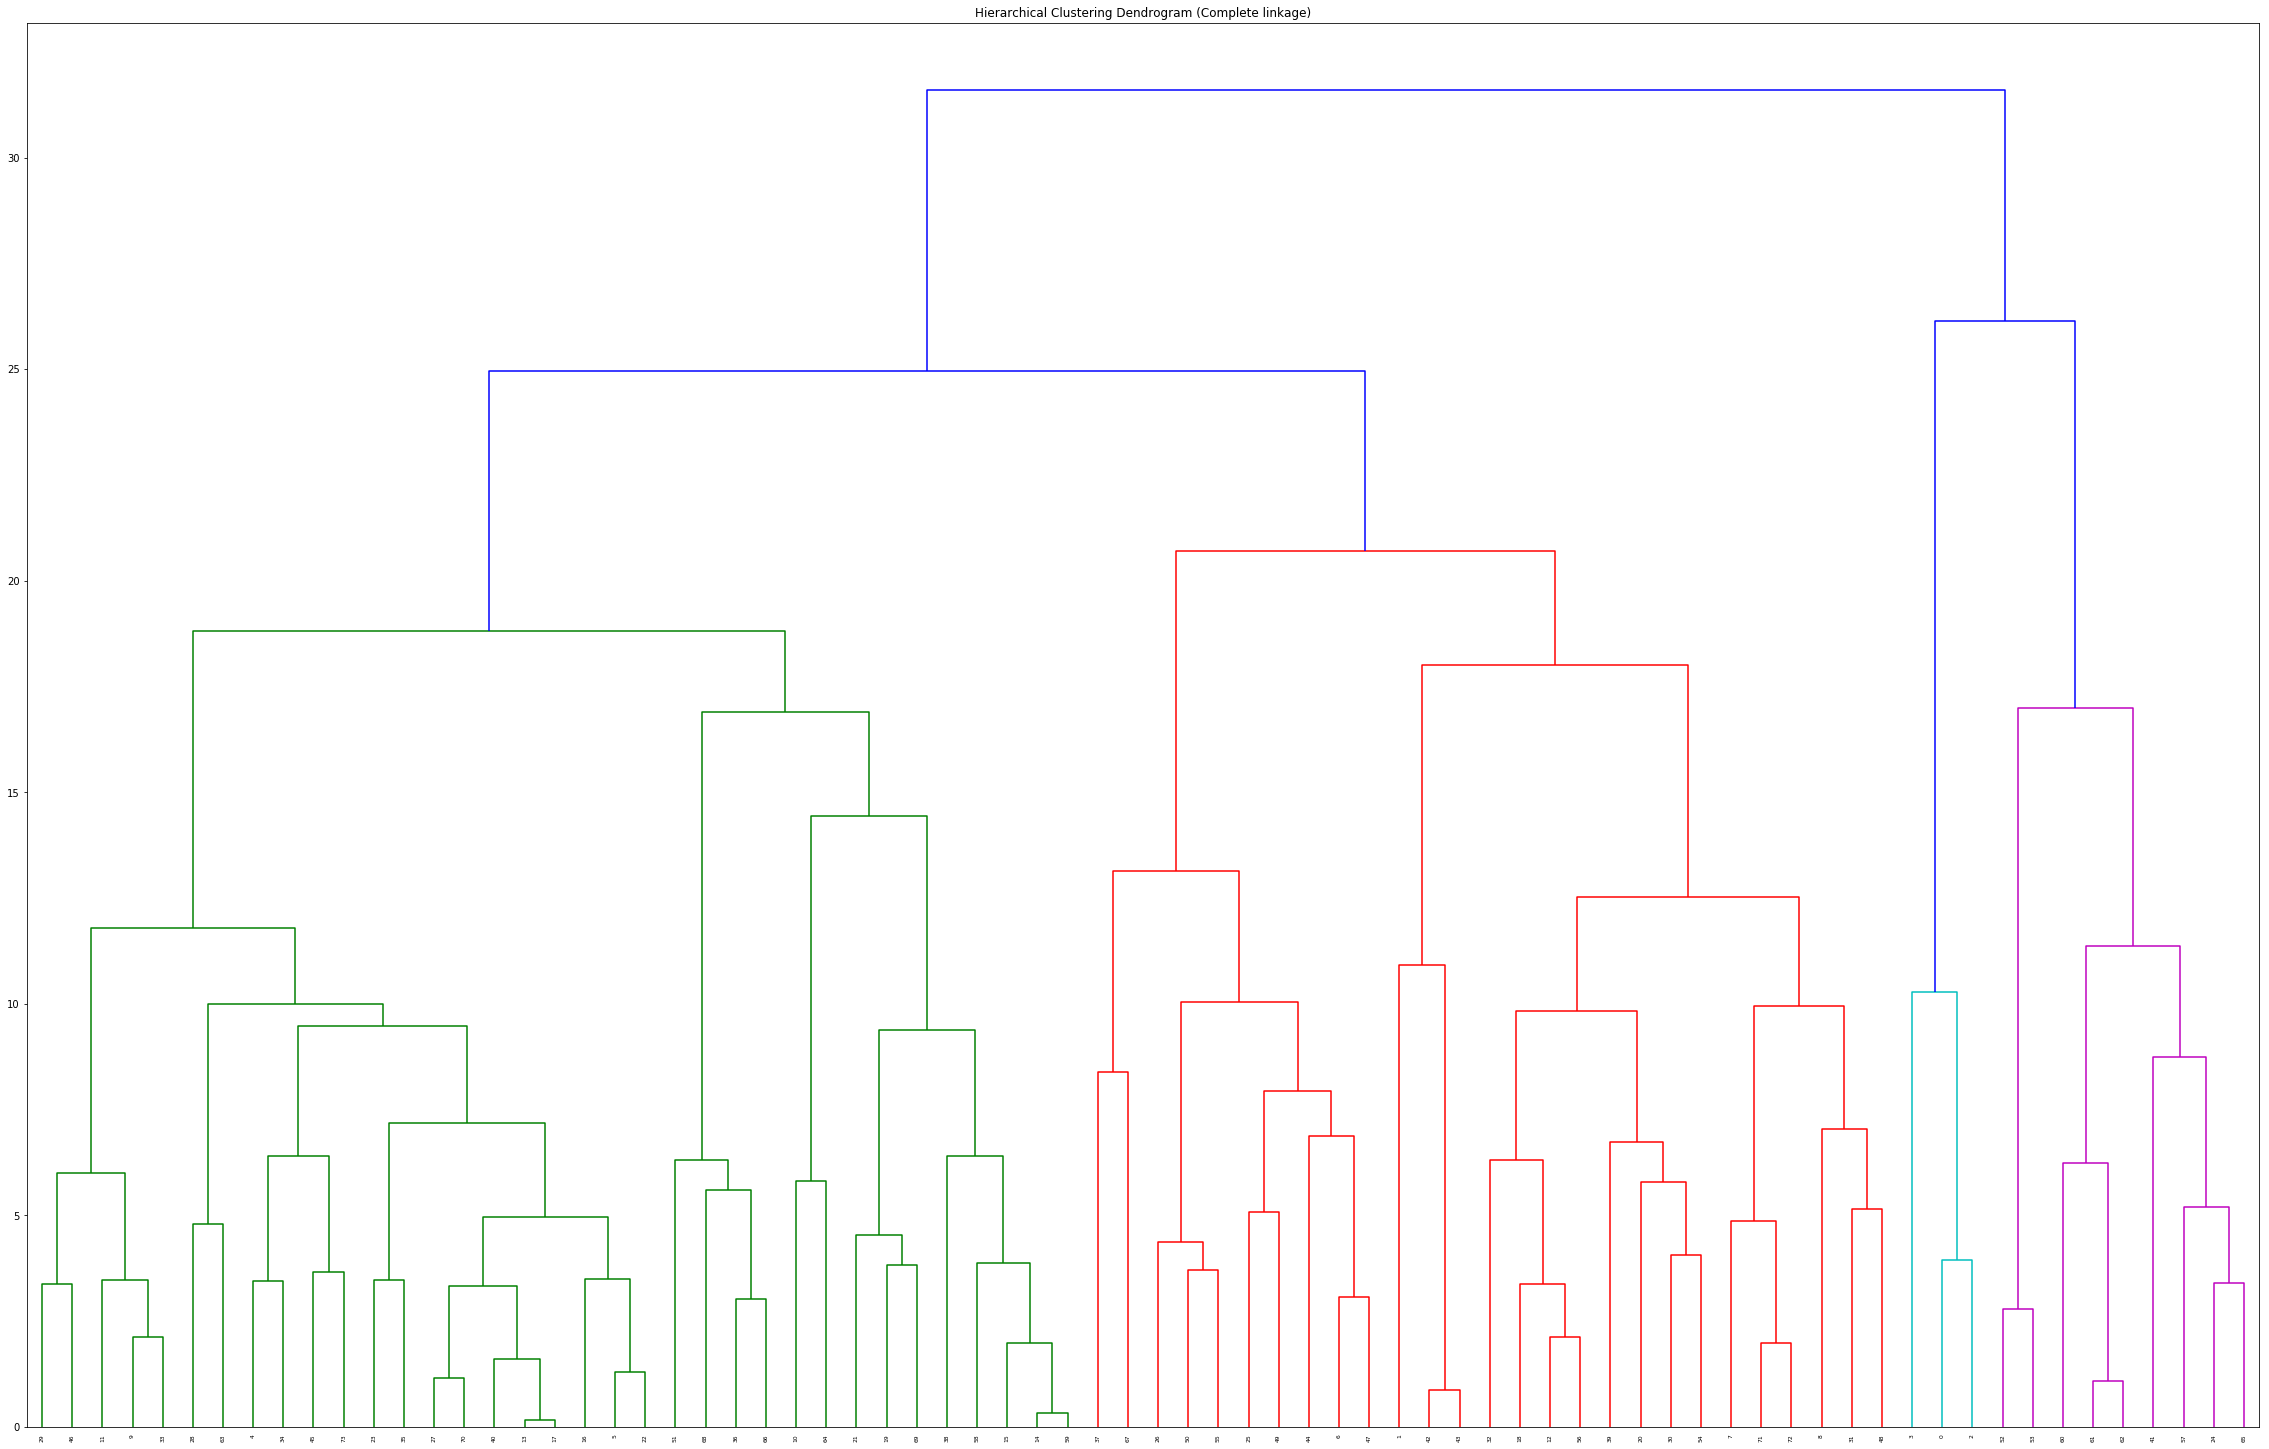

In [26]:
Z = linkage(cereals_df_norm, method='complete', metric='cityblock')
fig = plt.figure(figsize=(40, 30))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
dendrogram(Z, labels=cereals_df_norm.index)
plt.show()

In [32]:
memb = fcluster(linkage(cereals_df_norm, method='complete', metric='cityblock'), 6, criterion='maxclust')
centroids = {}
for key, item in cereals_df_norm.groupby(memb):
    centroids[key] = item.mean()
    print('Cluster {}: size {}'.format(key, len(item)))
pd.DataFrame(centroids).transpose().round(2)

Cluster 1: size 21
Cluster 2: size 14
Cluster 3: size 10
Cluster 4: size 17
Cluster 5: size 3
Cluster 6: size 9


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,0.20,-0.93,0.00,0.12,-0.67,-0.55,0.96,-0.75,-0.18,-0.66,-0.20,0.28,-0.97
2,0.01,0.12,-0.50,1.01,-0.58,1.29,-0.93,-0.64,0.78,-0.18,-0.20,0.88,0.07
3,1.27,0.46,0.40,0.36,0.61,0.21,0.88,1.05,0.49,0.83,2.06,-0.48,-0.44
4,0.06,0.57,0.71,-0.19,0.31,-0.23,-0.22,0.36,-0.25,0.45,-0.20,-0.52,0.22
5,-2.22,1.39,-0.33,0.17,3.67,-2.09,-0.79,3.00,-0.18,0.95,-0.20,-1.86,2.26
6,-1.26,-0.06,-0.89,-1.95,-0.03,0.16,-1.10,-0.11,-0.81,-0.26,-1.06,0.12,1.48


From the above single and complete method, we can see the clusters in complete method is stable and clearly seperated.

# Which method leads to the most insightful or meaningful clusters? Do you think the analysis will change if you use Euclidean distance? (4 points)

The complete method leads to the most meaningful clusters. If we use Euclidean distance, the analysis will not change much.

# Choose one of the methods. How many clusters would you use? What distance is used for this cutoff? (Look at the dendrogram.) (4 points)

I will choose the complete methods. 6 clusters can be used. distance=15 is used for this cutoff.

# The elementary public schools would like to choose a set of cereals to include in their daily cafeterias. Every day a different cereal is offered, but all cereals should support a healthy diet. For this goal, you are requested to find a cluster of “healthy cereals.” Should the data be normalized? If not, how should they be used in the cluster analysis? (5 points)

The data should be normalized. The data must be scaled, before measuring any type of distance metric as the variables with higher ranges will significantly influence the distance.